In [1]:
# Import required libraries
import random
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Constants and configuration
appointment_types = ["General Checkup", "Dermatology", "Cardiology", "Pediatrics", "ENT"]

In [3]:
# Patient database with demographics
patients = [
    {"id": 1, "name": "Ravi Kumar", "language": "Tamil", "age_group": "60+", "channel": "IVR", "response_rate": 0.7},
    {"id": 2, "name": "Ananya Rao", "language": "Telugu", "age_group": "30-45", "channel": "WhatsApp", "response_rate": 0.9},
    {"id": 3, "name": "Joseph Mathew", "language": "Malayalam", "age_group": "45-60", "channel": "SMS", "response_rate": 0.6},
    {"id": 4, "name": "Rahul Sharma", "language": "Hindi", "age_group": "30-45", "channel": "WhatsApp", "response_rate": 0.8},
    {"id": 5, "name": "David Thomas", "language": "English", "age_group": "18-30", "channel": "WhatsApp", "response_rate": 0.95},
    {"id": 6, "name": "Geetha Rani", "language": "Tamil", "age_group": "60+", "channel": "IVR", "response_rate": 0.5},
    {"id": 7, "name": "Priya Reddy", "language": "Telugu", "age_group": "30-45", "channel": "SMS", "response_rate": 0.75},
    {"id": 8, "name": "Mohan Das", "language": "Hindi", "age_group": "45-60", "channel": "IVR", "response_rate": 0.65},
    {"id": 9, "name": "Susan George", "language": "English", "age_group": "18-30", "channel": "WhatsApp", "response_rate": 0.92},
    {"id": 10, "name": "Abdul Kareem", "language": "Malayalam", "age_group": "60+", "channel": "IVR", "response_rate": 0.55}
]

In [4]:
# Multi-language message templates
messages = {
    "appointment_confirmation": {
        "Tamil": "நோயறிதல்: {appt_type}\nதேதி: {date}\nநேரம்: {time}\nஉங்கள் நேரம் உறுதிசெய்யப்பட்டது.",
        "Telugu": "అపాయింట్మెంట్ రకం: {appt_type}\nతేదీ: {date}\nసమయం: {time}\nమీ నియామకం నిర్ధారించబడింది.",
        "Malayalam": "അപ്പോയിന്റ്മെന്റ് തരം: {appt_type}\nതീയതി: {date}\nസമയം: {time}\nനിങ്ങളുടെ അപ്പോയിന്റ്മെന്റ് സ്ഥിരീകരിച്ചു.",
        "Hindi": "अपॉइंटमेंट प्रकार: {appt_type}\nतारीख: {date}\nसमय: {time}\nआपका अपॉइंटमेंट कन्फर्म हो गया है.",
        "English": "Appointment Type: {appt_type}\nDate: {date}\nTime: {time}\nYour appointment is confirmed."
    },
    "wait_time_update": {
        "Tamil": "தற்போதைய காத்திருப்பு நேரம்: {minutes} நிமிடங்கள்.",
        "Telugu": "ప్రస్తుత వేటింగ్ టైమ్: {minutes} నిమిషాలు.",
        "Malayalam": "നിലവിലെ കാത്തിരിപ്പ് സമയം: {minutes} മിനിറ്റ്.",
        "Hindi": "वर्तमान प्रतीक्षा समय: {minutes} मिनट।",
        "English": "Current waiting time: {minutes} minutes."
    }
}

In [5]:
def select_channel(patient, message_type):
    """Smart channel selection logic"""
    channel = patient["channel"]

    # WhatsApp for time-sensitive updates to younger patients
    if message_type == "wait_time_update" and patient["age_group"] in ["18-30", "30-45"]:
        channel = "WhatsApp"

    # Fallback for low responders
    if patient["response_rate"] < 0.6:
        if channel == "SMS":
            channel = "WhatsApp"
        elif channel == "WhatsApp":
            channel = "IVR"

    return channel

def generate_message(patient, message_type, **kwargs):
    """Generate localized message"""
    template = messages[message_type][patient["language"]]

    # Special formatting for elderly patients
    if patient["age_group"] == "60+":
        if n kwargs:
            if patient["language"] == "Tamil":
                kwargs["time"] = kwargs["time"].replace("AM", "காலை").replace("PM", "மாலை")
            elif patient["language"] == "Hindi":
                kwargs["time"] = kwargs["time"].replace("AM", "सुबह").replace("PM", "शाम")

    return template.format(**kwargs)

def send_message(patient, message_type, **kwargs):
    """Send message with 90% success rate simulation"""
    channel = select_channel(patient, message_type)
    message = generate_message(patient, message_type, **kwargs)

    if random.random() < 0.9:  # 90% success rate
        print(f"📩 [{channel}] to {patient['name']} ({patient['language']}, {patient['age_group']}):")
        print(f"   {message}\n")
        return True
    else:
        print(f"❌ Failed to send to {patient['name']} via {channel}")
        return False

In [6]:
def simulate_clinic_operations(days=7):
    """Run clinic communication simulation"""
    results = []

    for day in range(days):
        current_date = datetime.now() + timedelta(days=day)
        print(f"\n=== Day {day+1} ({current_date.strftime('%Y-%m-%d')}) ===")

        random.shuffle(patients)

        for patient in patients[:int(len(patients)*0.3)]:  # 30% patients per day
            appt_type = random.choice(appointment_types)
            appt_time = random.choice(["9:00 AM", "11:30 AM", "2:00 PM", "4:30 PM"])

            send_success = send_message(
                patient,
                "appointment_confirmation",
                appt_type=appt_type,
                date=current_date.strftime('%d/%m/%Y'),
                time=appt_time
            )

            if send_success:
                responded = random.random() < patient["response_rate"]

                if responded:  # Send wait time update
                    wait_time = random.randint(10, 90)
                    send_message(patient, "wait_time_update", minutes=wait_time)

                results.append({
                    "patient_id": patient["id"],
                    "day": day+1,
                    "message_type": "appointment_confirmation",
                    "channel": patient["channel"],
                    "language": patient["language"],
                    "age_group": patient["age_group"],
                    "responded": responded
                })

    return pd.DataFrame(results)

In [7]:
def analyze_results(results):
    """Calculate and display performance metrics"""
    if len(results) == 0:
        print("No results to analyze")
        return

    results_df = pd.DataFrame(results)

    # Response rates
    print("\n=== Effectiveness Metrics ===")
    print(f"Overall Response Rate: {results_df['responded'].mean():.1%}")

    # Grouped analysis
    metrics = {
        'By Language': results_df.groupby('language')['responded'].mean(),
        'By Channel': results_df.groupby('channel')['responded'].mean(),
        'By Age Group': results_df.groupby('age_group')['responded'].mean()
    }

    # Visualization
    plt.figure(figsize=(15, 4))
    for i, (title, data) in enumerate(metrics.items(), 1):
        plt.subplot(1, 3, i)
        data.sort_values().plot(kind='barh', color=['skyblue', 'lightgreen', 'salmon'][i-1])
        plt.title(title)
        plt.xlabel('Response Rate')
    plt.tight_layout()
    plt.show()

=== Apollo Clinic Communication System ===
Starting 7-day simulation with 10 patients...


=== Day 1 (2025-03-27) ===
📩 [IVR] to Mohan Das (Hindi, 45-60):
   अपॉइंटमेंट प्रकार: Dermatology
तारीख: 27/03/2025
समय: 9:00 AM
आपका अपॉइंटमेंट कन्फर्म हो गया है.

❌ Failed to send to David Thomas via WhatsApp
📩 [IVR] to Ravi Kumar (Tamil, 60+):
   நோயறிதல்: Pediatrics
தேதி: 27/03/2025
நேரம்: 9:00 காலை
உங்கள் நேரம் உறுதிசெய்யப்பட்டது.

📩 [IVR] to Ravi Kumar (Tamil, 60+):
   தற்போதைய காத்திருப்பு நேரம்: 78 நிமிடங்கள்.


=== Day 2 (2025-03-28) ===
📩 [IVR] to Abdul Kareem (Malayalam, 60+):
   അപ്പോയിന്റ്മെന്റ് തരം: Dermatology
തീയതി: 28/03/2025
സമയം: 4:30 PM
നിങ്ങളുടെ അപ്പോയിന്റ്മെന്റ് സ്ഥിരീകരിച്ചു.

📩 [WhatsApp] to Rahul Sharma (Hindi, 30-45):
   अपॉइंटमेंट प्रकार: Cardiology
तारीख: 28/03/2025
समय: 11:30 AM
आपका अपॉइंटमेंट कन्फर्म हो गया है.

📩 [WhatsApp] to Rahul Sharma (Hindi, 30-45):
   वर्तमान प्रतीक्षा समय: 25 मिनट।

📩 [SMS] to Priya Reddy (Telugu, 30-45):
   అపాయింట్మెంట్ రకం: General Check

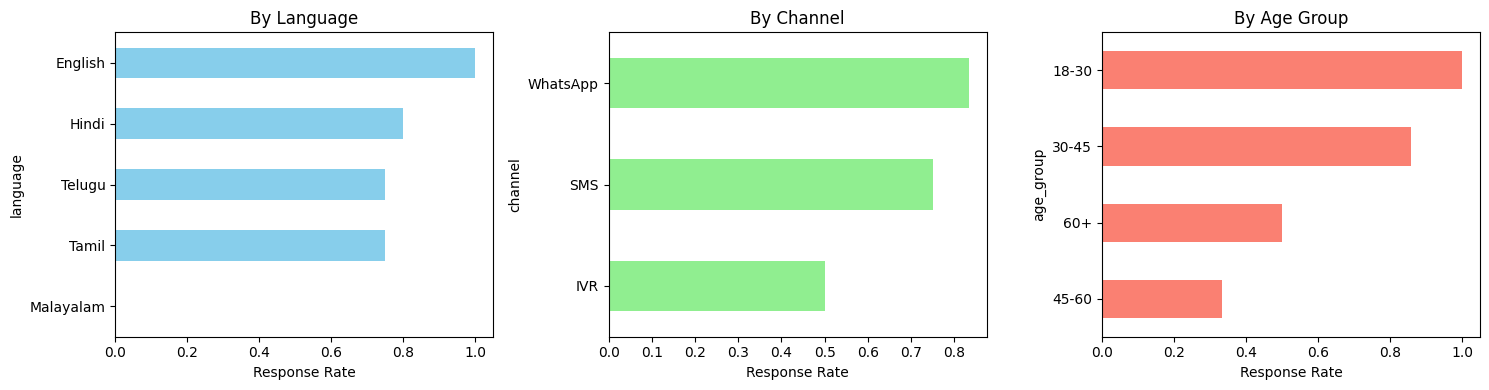

In [8]:
# Main execution block
if __name__ == "__main__":
    print("=== Apollo Clinic Communication System ===")
    print("Starting 7-day simulation with 10 patients...\n")

    results = simulate_clinic_operations(days=7)

    if len(results) > 0:
        analyze_results(results)
    else:
        print("No messages were sent during simulation")